In [1]:
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

Import the training and validation dataset

In [0]:
training_data = pathlib.Path('/content/drive/My Drive/CloudAssignment/images/training')
validation_data = pathlib.Path('/content/drive/My Drive/CloudAssignment/images/validation')

Data Exploration

In [9]:
image_count = len(list(training_data.glob('*/*.jpg')))
print(image_count)

600


In [26]:
image_count = len(list(validation_data.glob('*/*.jpg')))
print(image_count)

150


In [10]:
CLASS_NAMES = np.array([item.name for item in training_data.glob('*')])
CLASS_NAMES

array(['red', 'green', 'blue'], dtype='<U5')

Define parameters for the loader

In [0]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

Inspect batch of images

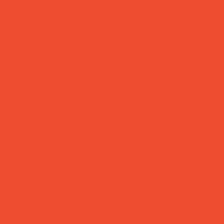

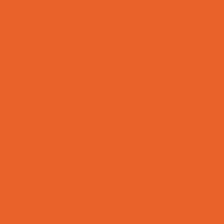

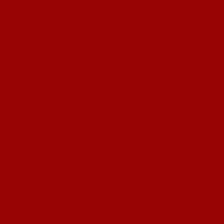

In [11]:
red = list(training_data.glob('red/*'))

for image_path in red[:3]:
  display.display(Image.open(str(image_path)))

Note : I didnt choose to preprocess images since image augmentation and changing the brightness might confuse the model

###Load using tf.data
keras.preprocessing method is 
convienient, but has three downsides:



1.   It's slow.
2.   It lacks fine-grained control.
3.   It is not well integrated with the rest of TensorFlow.


 

####To load the files as a tf.data.Dataset first create a dataset of the file paths:

In [0]:
list_ds = tf.data.Dataset.list_files(str(training_data/'*/*'))

In [13]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/drive/My Drive/CloudAssignment/images/training/blue/157.jpg'
b'/content/drive/My Drive/CloudAssignment/images/training/green/77.jpg'
b'/content/drive/My Drive/CloudAssignment/images/training/green/93.jpg'
b'/content/drive/My Drive/CloudAssignment/images/training/red/115.jpg'
b'/content/drive/My Drive/CloudAssignment/images/training/blue/111.jpg'


In [0]:
valid_ds = tf.data.Dataset.list_files(str(validation_data/'*/*'))

In [0]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [0]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [0]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Use Dataset.map to create a dataset of image, label pairs for training and validation set

In [0]:
training_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
training_batch = training_ds.batch(BATCH_SIZE)

In [31]:
for image, label in training_ds.take(600):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False  True

In [0]:
validation_ds = valid_ds.map(process_path, num_parallel_calls=AUTOTUNE)
validation_batch = validation_ds.batch(BATCH_SIZE)

In [32]:
for image, label in validation_ds.take(150):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False False  True]
Image shape:  (224, 224, 3)
Label:  [ True False False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False  True False]
Image shape:  (224, 224, 3)
Label:  [False  True

Building the model for classification

In [0]:
def build_model():
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation="softmax"))

    return model


Compile and train the model 


In [41]:
model_cnn = build_model()
model_cnn.summary()


model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


history = model_cnn.fit(training_batch, validation_data=validation_batch, epochs=10, steps_per_epoch=STEPS_PER_EPOCH )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 64)       

Evaluation of the created model

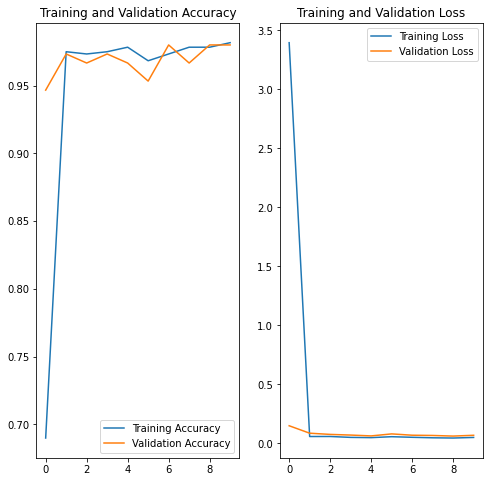

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving the model to use for predictions so that model need not be complied everytime 

In [0]:
model_cnn.save('/content/drive/My Drive/CloudAssignment/models/firstTest.h5')

In [78]:




print(img)


tf.Tensor(
[[[[0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   ...
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]]

  [[0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   ...
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]]

  [[0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   ...
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]]

  ...

  [[0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   ...
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]
   [0.7843138  0.12941177 0.19607845]]

  [[0.7843138  0.12941177 0.196078

Red
